# OCR(Optical Character Recognition)
This OCR app will be used to extract text from an image of handwritten notes

# Pipeline of the application:
* Take image(Handwritten notes)--->Process the image (Computer Vision)--->LLM(Role assigned as OCR)

In [1]:
#pip install opencv-python

In [22]:
# pip install streamlit

  Using cached streamlit-1.53.0-py3-none-any.whl.metadata (10 kB)
  Using cached altair-6.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.2.4-py3-none-any.whl.metadata (5.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached gitpython-3.1.46-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.26.0-py3-none-any.whl.metadata (7.6 kB)
  Using cached narwhals-2.15.0-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
Using

In [2]:
import cv2
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
import google.generativeai as genai
from PIL import Image
import os

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/xr/kf7mghcd26n8fl5cqv9_6t100000gp/T/ipykernel_63155/3457948912.py:2: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [5]:
image=cv2.imread('Handwritten_notes.png')

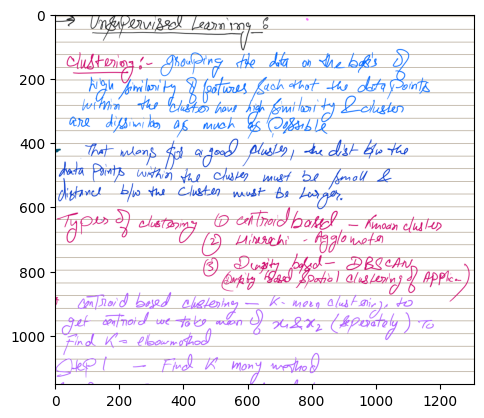

In [6]:
plt.imshow(image)
plt.show()

In [7]:
image= cv2.imread('Handwritten_notes.png') # right now is a BGR image 

In [8]:
# It's a colored image
image.shape

(1152, 1308, 3)

In [9]:
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # BGR-->RGB

In [10]:
image_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # RGB --> greyscale

In [11]:
# cv2.imshow('Grey Image',image_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [12]:
_,image_bw = cv2.threshold(image_gray,170,255,cv2.THRESH_BINARY)

In [13]:
# Configure LLM
gemini_key=os.getenv('GOOGLE_API_KEY1')
genai.configure(api_key=gemini_key)
model=genai.GenerativeModel('gemini-2.5-flash-lite',
                            generation_config={'temperature':0.5})

In [14]:
# The image that CV2 image has given is numpy array format,we need to convert it to image 
final_image=Image.fromarray(image_bw)

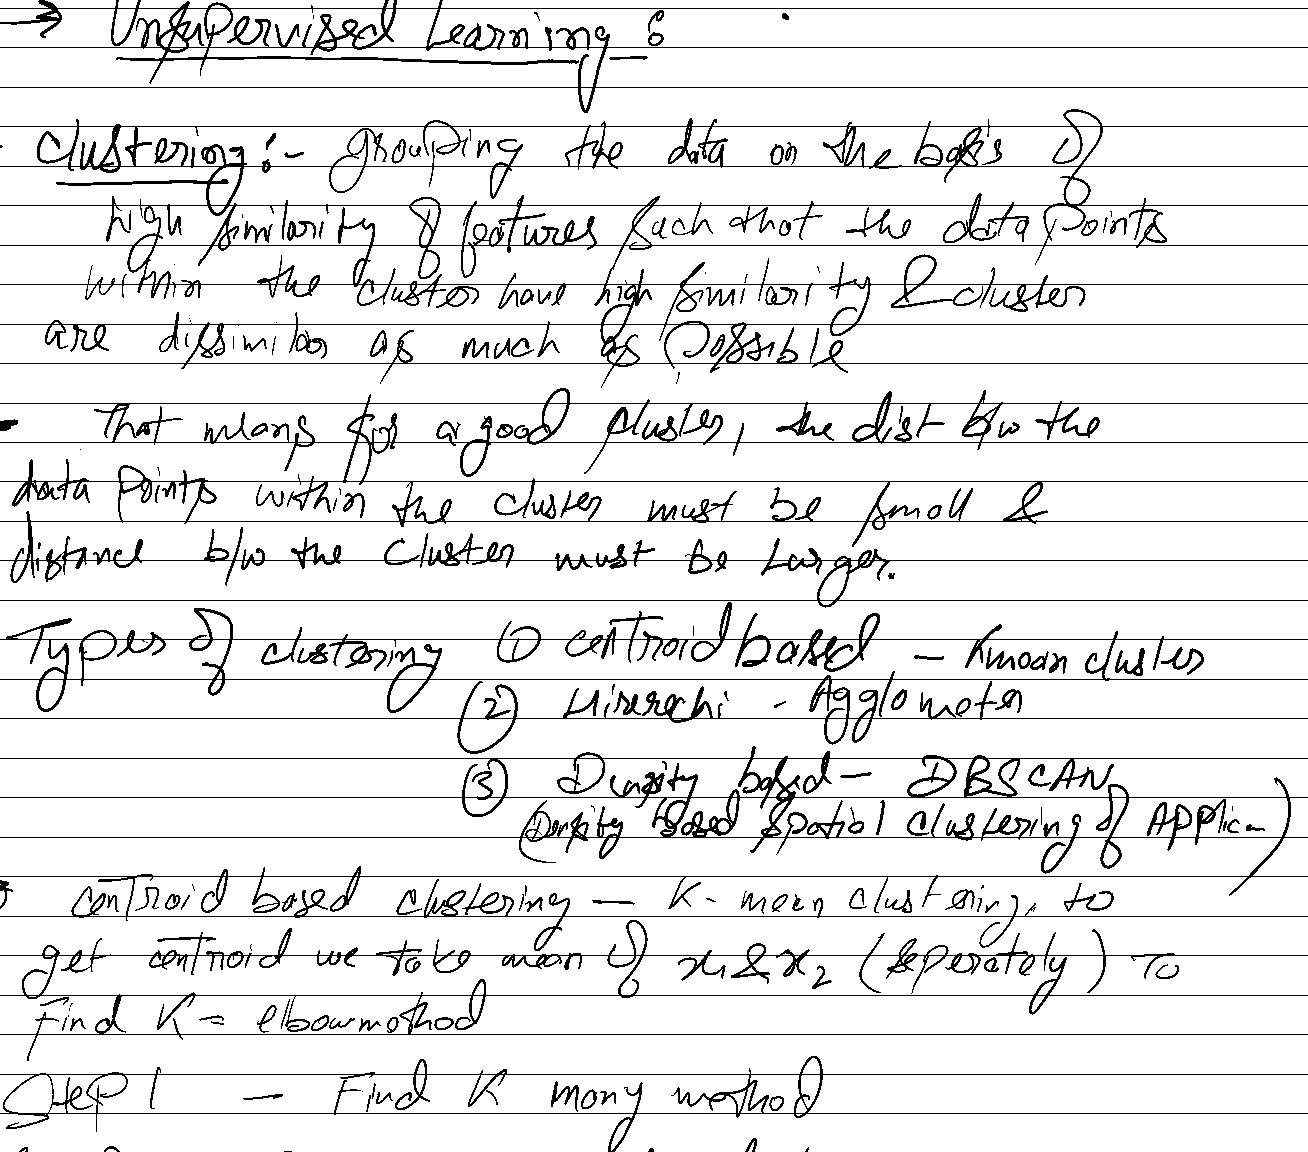

In [15]:
final_image

In [16]:
prompt='''
<ROle> You are an OCR (Optical Character Recognition) application.
<Goal> Identify the characters in handwritten notes.
<Context> user has provided the image of handwritten notes.
<Instruction> 
* Do not generate any new content.
* You can complete a word which is not recognised based on the english dictionary with coorect grammer.
* Output should be well formatted
'''

In [17]:
response=model.generate_content([prompt,final_image])
print(response.text)

* Unsupervised Learning &
* Clustering:- Grouping the data on the basis of
High similarity of features such that the data points
within the Cluster have high similarity & cluster
are dissimilar as much as possible

* That means for a good cluster, the dist b/w the
data points within the cluster must be small &
distance b/w the cluster must be larger.

Types of clustering:
(1) Centroid based - K-mean clusters
(2) Hierarchical - Agglomeration
(3) Density based - DBSCAN
(Density Based Spatial Clustering of Applications)

Centroid based clustering - K-mean clustering, to
get centroid we take mean of $x_1 \& x_2$ (separately) to
find K = elbow method

Step 1 - Find K many method


EXTRACTING TEXT FROM WORD DOC


In [18]:
pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.2 kB/s  0:02:17 eta 0:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [python-docx] [python-docx]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from docx import Document

In [20]:
file=Document('DATASETS AND THEIR PROBLEM STATEMENT.docx')

In [21]:
doc_text = ''
for p in file.paragraphs:
    doc_text = doc_text + p.text + '\n'

print(doc_text)

DATASETS AND THEIR PROBLEM STATEMENT

DATASET 1: Registered Business Locations - San Francisco
WEBSITE LINK :  https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis/about_data

PROBLEM STATEMENT: 
 “To evaluate the effectiveness of the Business and Tax Regulations Code by analysing filing consistency and administrative closures across different business categories.”
Rows- 351K
Columns- 33
DATASET LINK: "C:\Users\LOQ\Downloads\Registered_Business_Locations_-_San_Francisco_20251129.csv"


DATASET 2: Employee Compensation
WEBSITE LINK:  https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/about_data

PROBLEM STATEMENT: 
Employee compensation 
Problem Statement-The City of San Francisco spends billions annually on employee compensation. However, there is limited visibility into how salaries and benefits have evolved across departments, job roles, and years. This project aims to analyse salary and benefit trends since